/var/folders/r8/wg9zpqm500d4m_l57fss70sc0000gn/T/ipykernel_88377/1331763769.py:8: DtypeWarning: Columns (42,45,46,54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_path, sep="\t")
/Users/vshulev/Projects/personal/amazon-lofi-beats/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


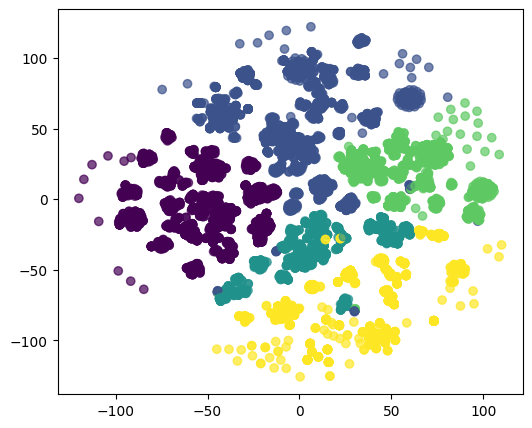

In [22]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

data_path = "amazon_data.tsv"
df = pd.read_csv(data_path, sep="\t")
df["embeddings"] = df["embeddings"].apply(lambda x: np.array(list(map(float, x[1:-1].split()))))
df = df[df["genus"].notna()]

# Pick genuses with most samples
top_k = 5
genus_counts = df["genus"].value_counts()
top_genuses = genus_counts.head(top_k).index
df = df[df["genus"].isin(top_genuses)]

# Create a t-SNE plot of the embeddings
n_genus = len(df["genus"].unique())
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=0)

X = np.stack(df["embeddings"].tolist())
y = df["genus"].tolist()

X_tsne = tsne.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_encoded, cmap="viridis", alpha=0.7)
plt.show()